In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
# Configurações para visualização
sns.set(style='whitegrid')

In [4]:
# Definindo a semente para reprodutibilidade
np.random.seed(42)

# Gerando um processo ARIMA(0,1,1)
# Parâmetros do modelo
n = 1000  # Número de observações
ar_params = [0, 0]  # Coeficientes AR
ma_params = [0.4, 0]    # Coeficientes MA
d = 1  # Diferença

In [10]:
# Gerando a série temporal
# Primeiro, geramos um processo ARIMA(0,1,1) e depois aplicamos a acumulação
arma_process = sm.tsa.ArmaProcess(ar=[1, -ar_params[0], -ar_params[1]], 
                                    ma=[1, ma_params[0], ma_params[1]])

In [12]:
# Gerando a série ARMA
arma_sample = arma_process.generate_sample(nsample=n)

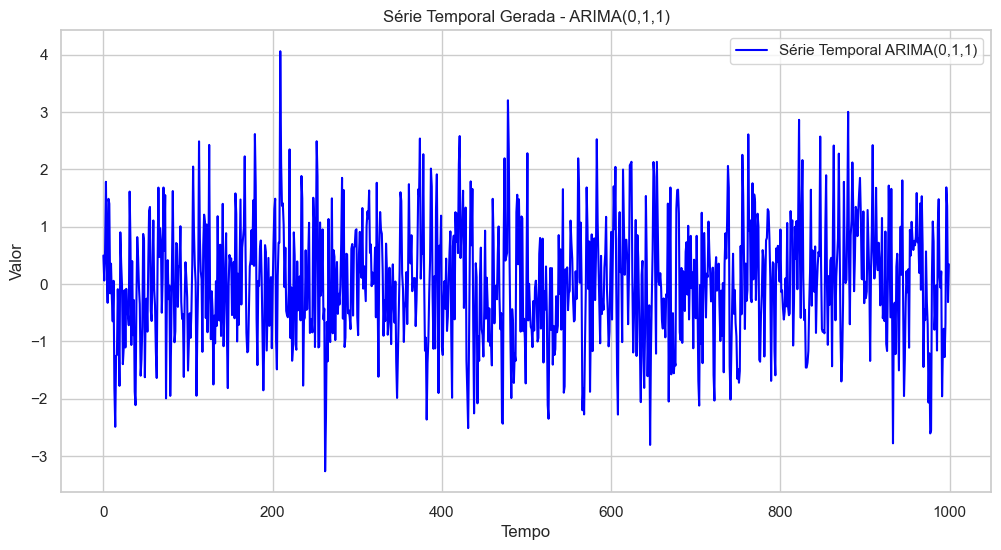

In [13]:
# Convertendo para uma série temporal
time_series = pd.Series(arma_sample)

# Plotando a série temporal
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Série Temporal ARIMA(0,1,1)', color='blue')
plt.title('Série Temporal Gerada - ARIMA(0,1,1)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()


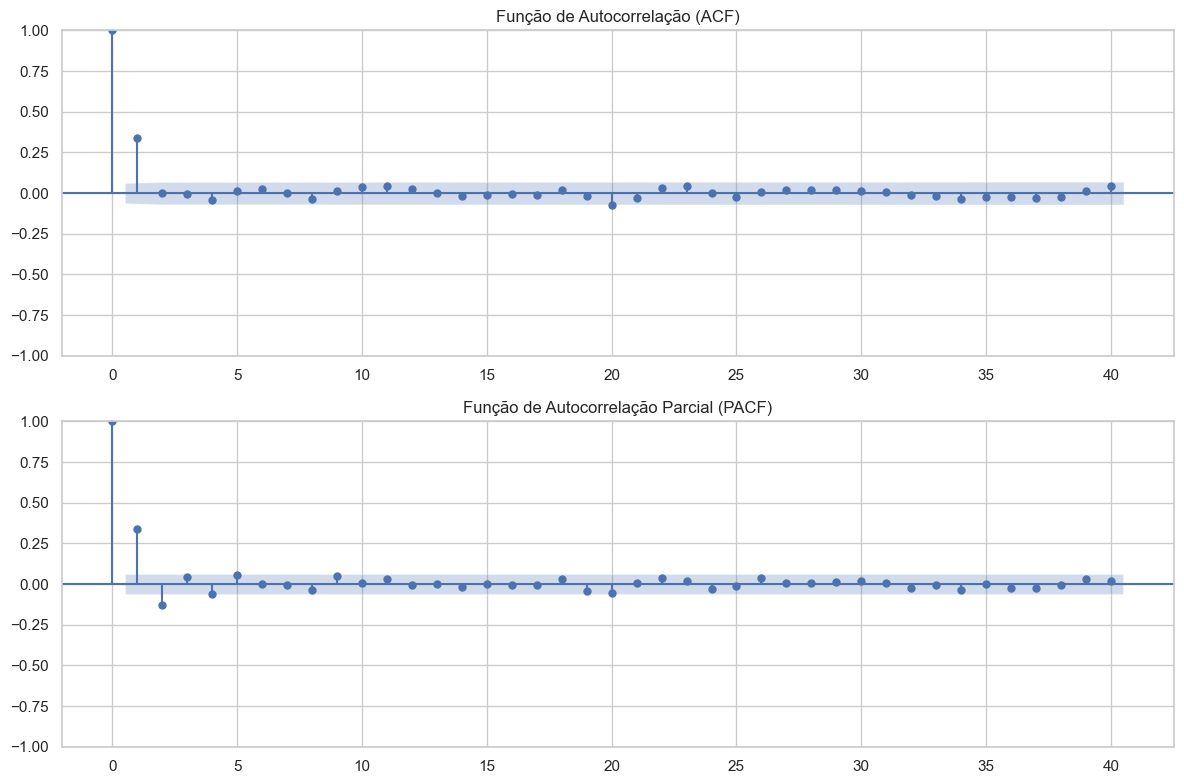

In [14]:
# Calculando ACF e PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF
sm.graphics.tsa.plot_acf(time_series, lags=40, ax=ax[0])
ax[0].set_title('Função de Autocorrelação (ACF)')

# PACF
sm.graphics.tsa.plot_pacf(time_series, lags=40, ax=ax[1])
ax[1].set_title('Função de Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()

In [15]:
# First-order summation (cumulative sum)
first_order_sum = np.cumsum(arma_sample)


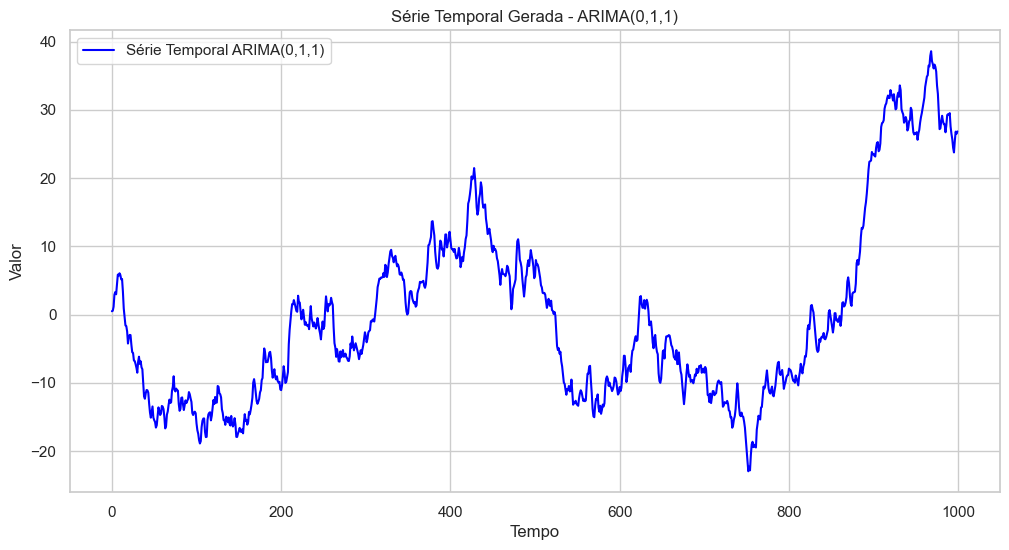

In [27]:
# Plotando a série temporal acumulada 1

plt.figure(figsize=(12, 6))
plt.plot(first_order_sum, label='Série Temporal ARIMA(0,1,1)', color='blue')
plt.title('Série Temporal Gerada - ARIMA(0,1,1)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

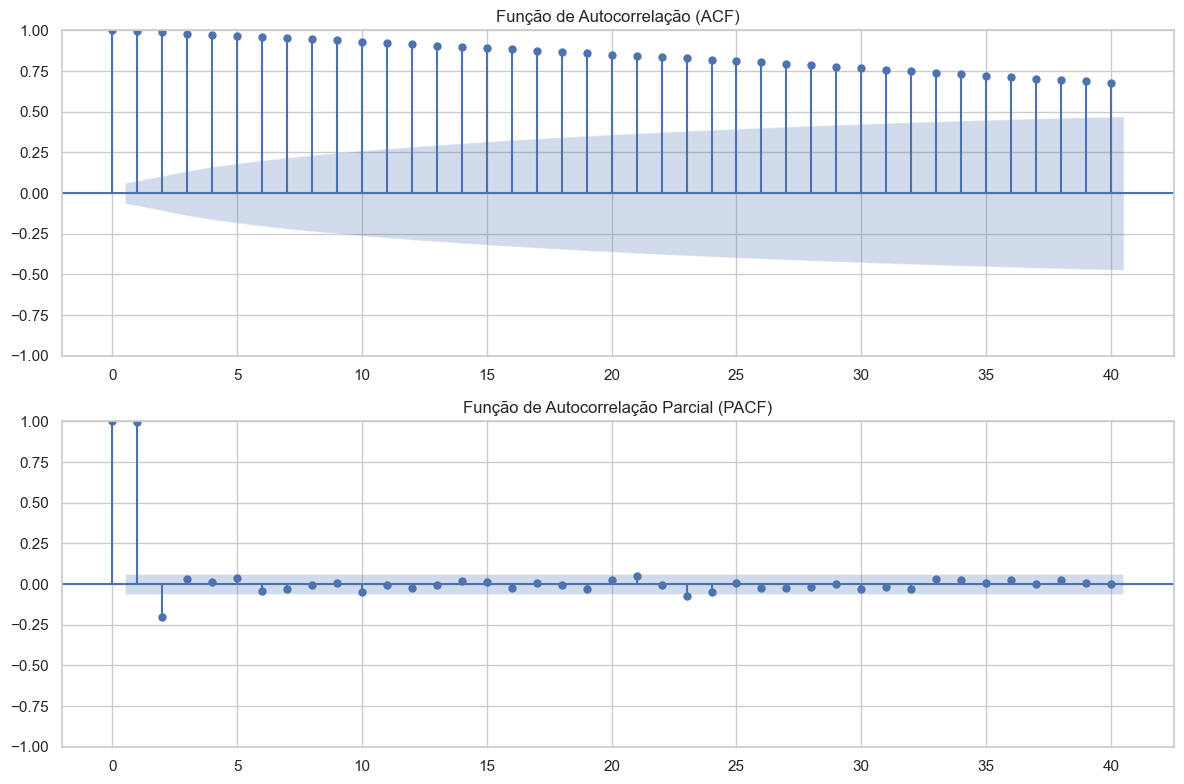

In [29]:
# Calculando ACF e PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF
sm.graphics.tsa.plot_acf(first_order_sum, lags=40, ax=ax[0])
ax[0].set_title('Função de Autocorrelação (ACF)')

# PACF
sm.graphics.tsa.plot_pacf(first_order_sum, lags=40, ax=ax[1])
ax[1].set_title('Função de Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# Fit ARIMA(2,2,2) model to the generated data
model = ARIMA(first_order_sum, order=(2, 2, 2))
fitted_model = model.fit()

In [20]:
# Compute the first difference
first_difference = np.diff(first_order_sum)

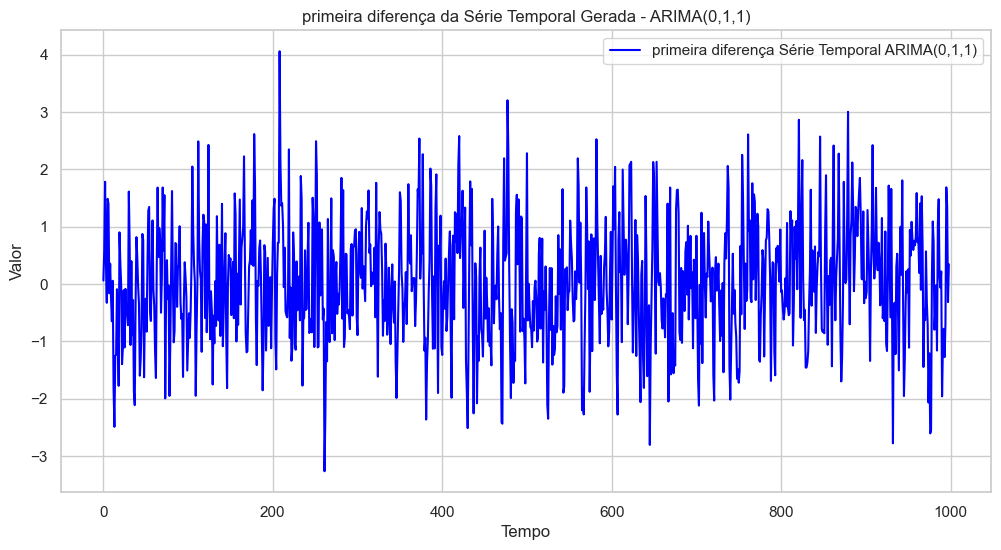

In [21]:
# Plotando a primeira diferença da série temporal acumulada 1

plt.figure(figsize=(12, 6))
plt.plot(first_difference, label='primeira diferença Série Temporal ARIMA(0,1,1)', color='blue')
plt.title('primeira diferença da Série Temporal Gerada - ARIMA(0,1,1)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

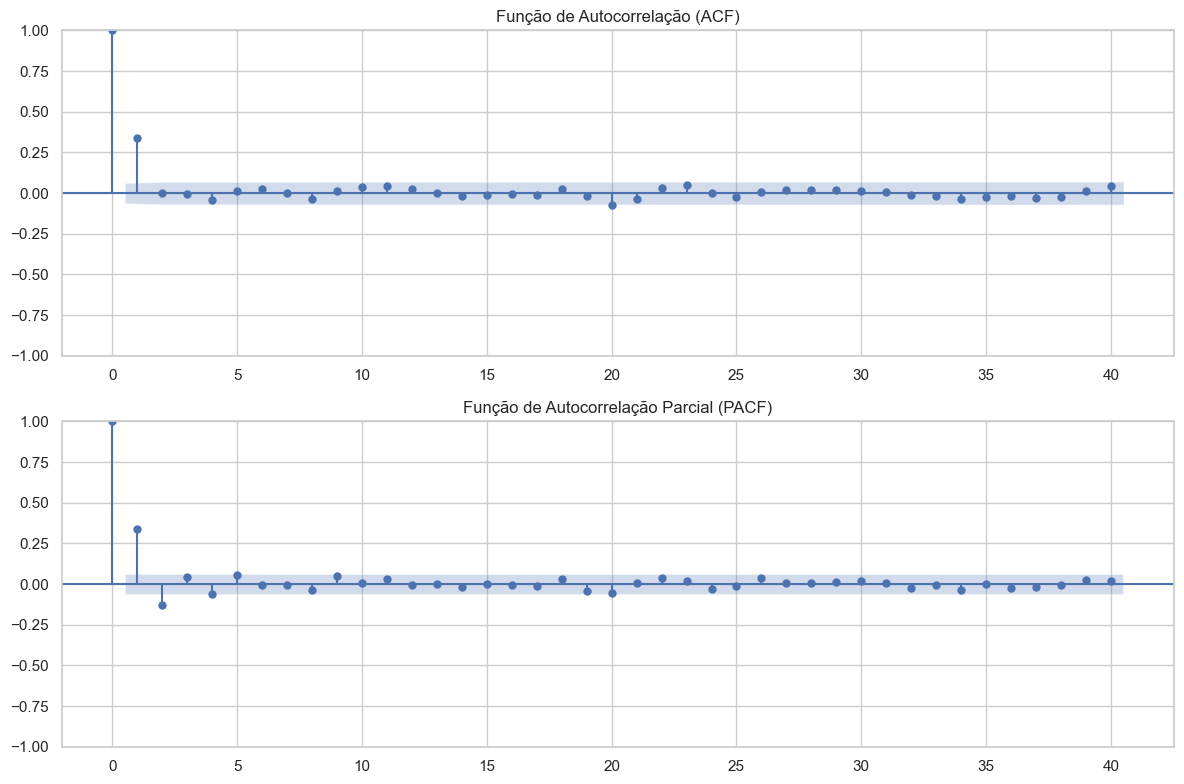

In [22]:
# Calculando ACF e PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF
sm.graphics.tsa.plot_acf(first_difference, lags=40, ax=ax[0])
ax[0].set_title('Função de Autocorrelação (ACF)')

# PACF
sm.graphics.tsa.plot_pacf(first_difference, lags=40, ax=ax[1])
ax[1].set_title('Função de Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()

In [23]:
# Compute the second difference
second_difference = np.diff(first_difference)

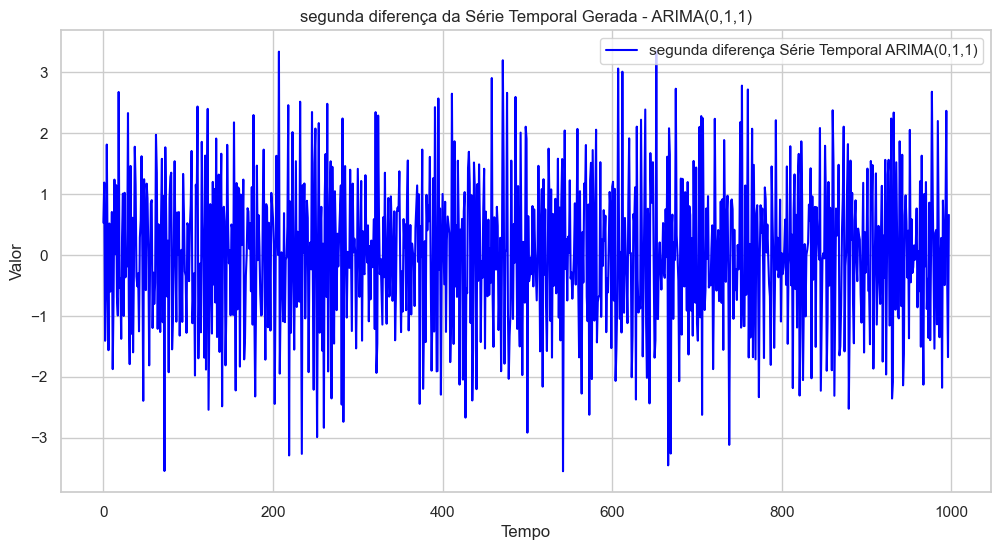

In [24]:
# Plotando a segunda diferença da série temporal acumulada 2

plt.figure(figsize=(12, 6))
plt.plot(second_difference, label='segunda diferença Série Temporal ARIMA(0,1,1)', color='blue')
plt.title('segunda diferença da Série Temporal Gerada - ARIMA(0,1,1)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

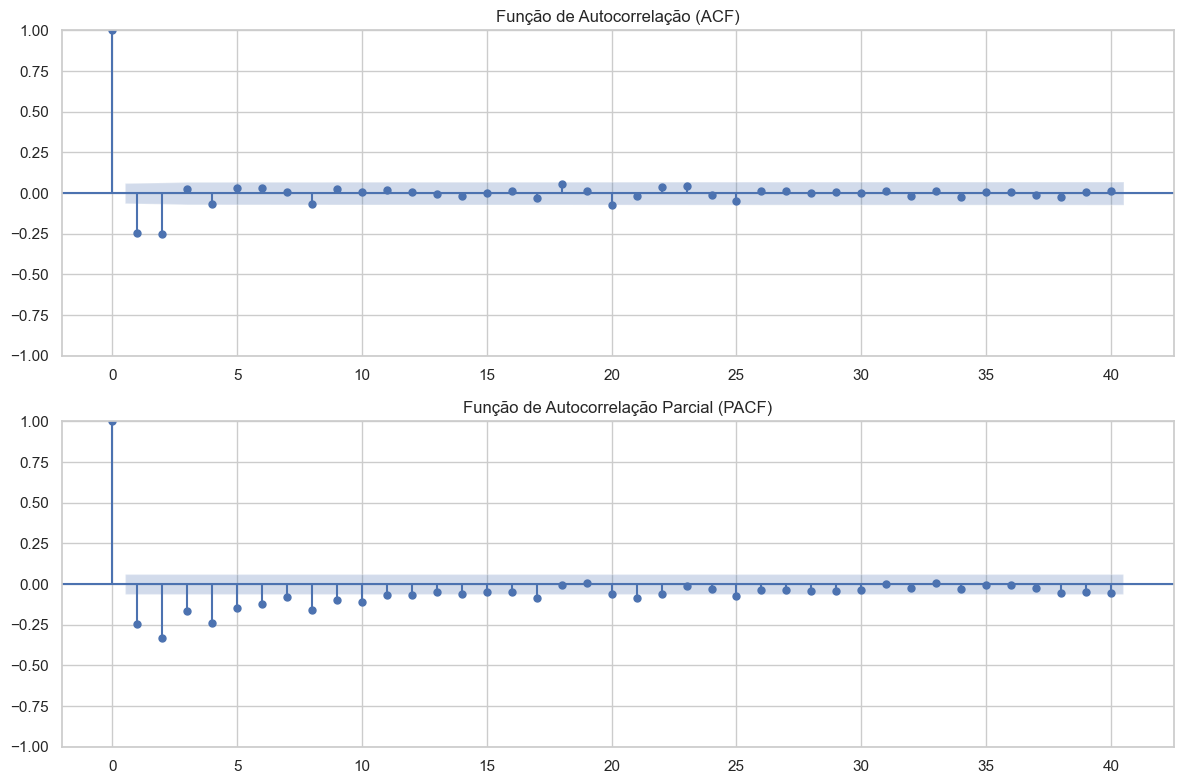

In [25]:
# Calculando ACF e PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF
sm.graphics.tsa.plot_acf(second_difference, lags=40, ax=ax[0])
ax[0].set_title('Função de Autocorrelação (ACF)')

# PACF
sm.graphics.tsa.plot_pacf(second_difference, lags=40, ax=ax[1])
ax[1].set_title('Função de Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()

In [26]:
# Or full model summary
print("\nModel Summary:")
print(fitted_model.summary())


Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1397.196
Date:                Mon, 24 Mar 2025   AIC                           2804.391
Time:                        10:28:00   BIC                           2828.920
Sample:                             0   HQIC                          2813.715
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3237      0.113     -2.877      0.004      -0.544      -0.103
ar.L2          0.1294      0.061      2.116      0.034       0.010       0.249
ma.L1         -0.2816      0.106    

In [31]:
# Fit ARIMA(2,1,2) model to the generated data - It is important nto identify the order of differences to perform.
model = ARIMA(first_order_sum, order=(2, 1, 2))
fitted_model = model.fit()

In [32]:
# Or full model summary
print("\nModel Summary:")
print(fitted_model.summary())


Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1394.735
Date:                Mon, 24 Mar 2025   AIC                           2799.470
Time:                        10:37:37   BIC                           2824.004
Sample:                             0   HQIC                          2808.795
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6405      0.348     -1.839      0.066      -1.323       0.042
ar.L2          0.0717      0.106      0.677      0.499      -0.136       0.279
ma.L1          1.0365      0.350    